## **Why Learn Data Visualization?**
If you do any work with data, whether that be through business, machine
learning, or artificial intelligence, you're going to want to know about how to
put together visualizations. Visualizations serve two major purposes in the 
data analysis process.

First of all, visualizations can be used during your initial data exploration 
to help you make insights into your data. Visualizations can reveal patterns in 
the data that statistics alone might not provide. They can also provide an 
intuition about the structure of your data. In addition to answering your 
research questions, visualizations might promote new questions for further 
investigation.

Secondly, visualizations can help you convey your insights to others through 
explanatory plots. By generating new visualizations or polishing and refining 
the plots created during exploration, you can more easily show others what you 
found in your analysis. A good visualization can communicate your findings 
quickly and succinctly.

## **What is Tidy Data?**
Usually, it is expected that your data is organized in some kind of tidy format. In short, a tidy dataset is a tabular dataset where:

- each variable is a column
- each observation is a row
- each type of observational unit is a table
The first three images below depict a tidy dataset. This tidy dataset is in the field of healthcare and has two tables: one for patients (with their patient ID, name, and age) and one for treatments (with patient ID, what drug that patient is taking, and the dose of that drug).

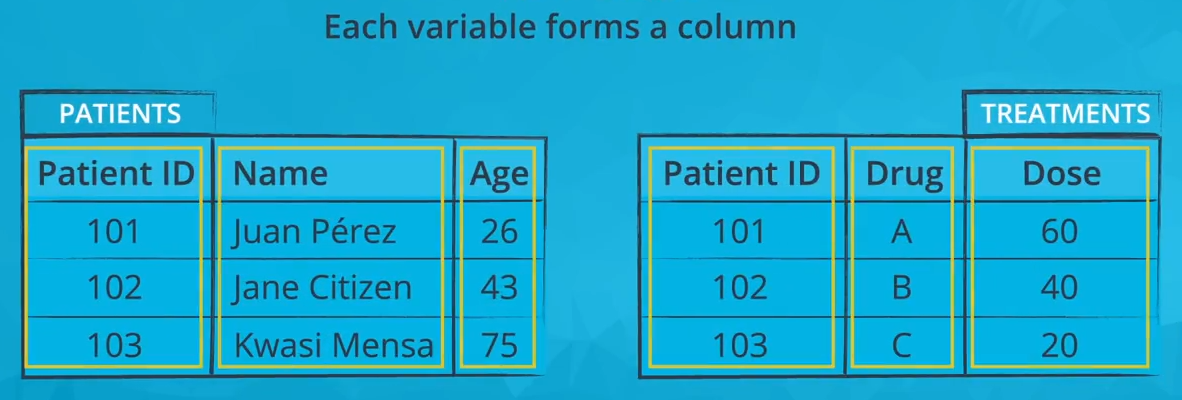

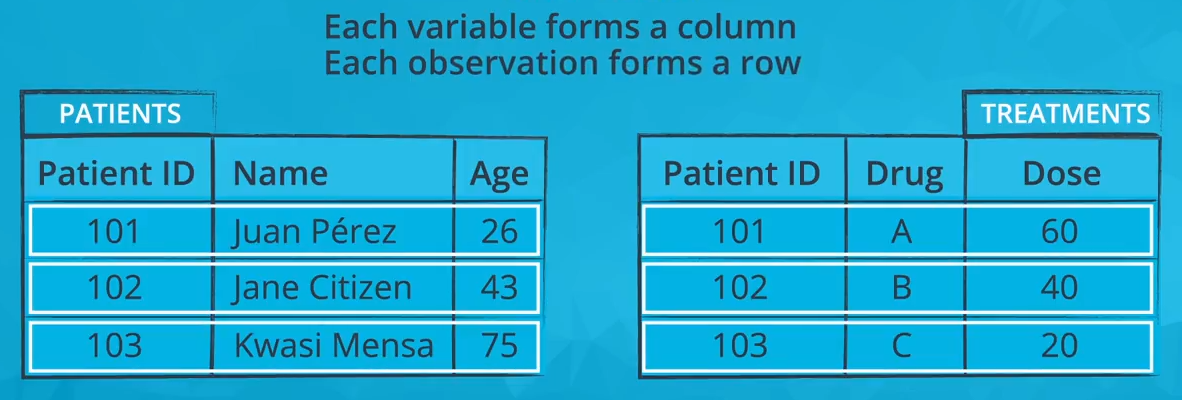

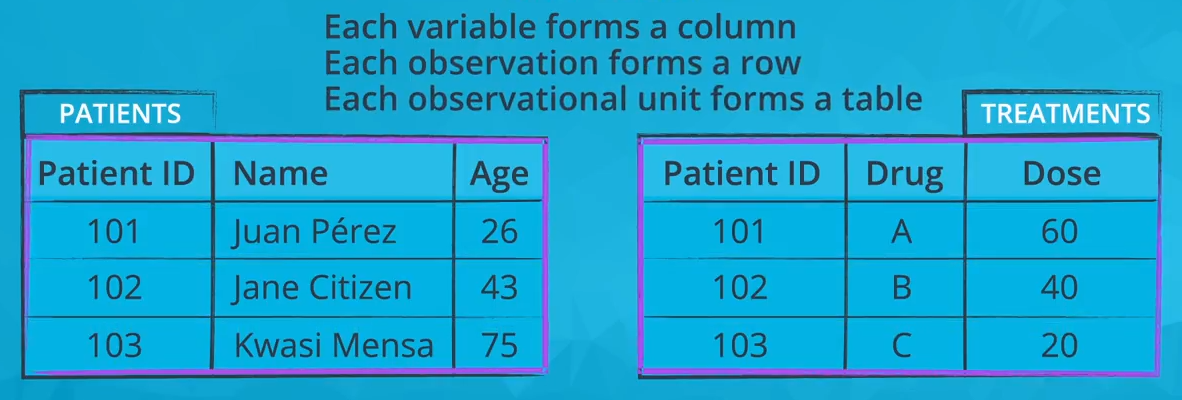

The next image depicts the same data but in one representation of a non-tidy format (there are other possible non-tidy representations). The Drug A, Drug B, and Drug C columns should form one 'Drug' column, since this is one variable. The entire table should be separated into two tables: a patients table and a treatments table.

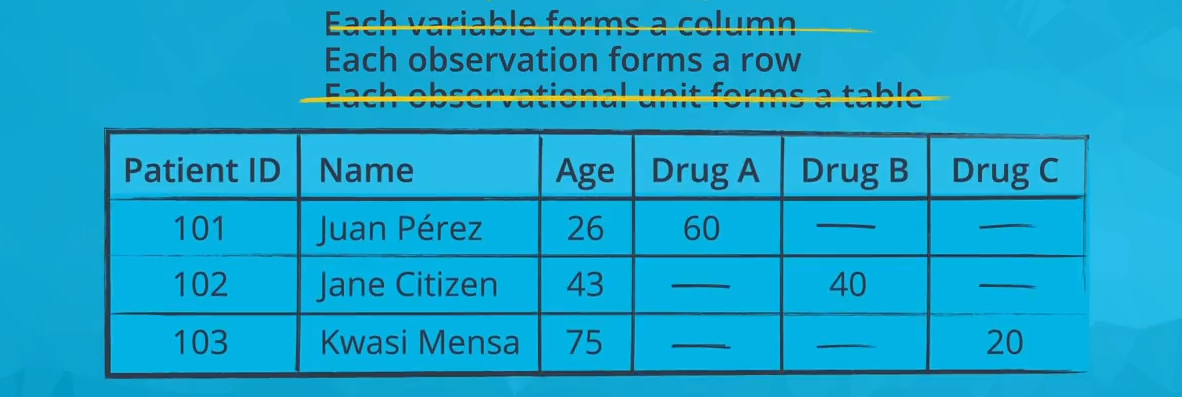

While the data provided to you in the course will all be tidy, in practice, you may need to perform tidying work before exploration. You should be comfortable with reshaping your data or perform transformations to split or combine features in your data, resulting in new data columns. This work should be performed in the wrangling stage of the data analysis process.

## **The Four Levels of Measurement:**
In order to choose an appropriate plot type or method of analysis for your data, you need to understand the types of data you have. One common method divides the data into four **levels of measurement**:

### Qualitative or categorical types (non-numeric types)
1. **Nominal data:** pure labels without inherent order (no label is intrinsically greater or less than any other).**eg:** Gender, Marital Status, Breakfast Items
2. **Ordinal data:** labels with an intrinsic order or ranking (comparison operations can be made between values, but the magnitude of differences are not be well-defined).**eg:**	Letter Grade, Survey Rating

### Quantitative or numeric types
3. **Interval data:** numeric values where absolute differences are meaningful (addition and subtraction operations can be made).
4. **Ratio data:** numeric values where relative differences are meaningful (multiplication and division operations can be made)

All quantitative-type variables also come in one of two varieties: **discrete and continuous.**

- **Discrete quantitative** variables can only take on a specific set values at some maximum level of precision.**eg:**Pages in a Book, Trees in Yard, Dogs at a Coffee Shop
- **Continuous quantitative** variables can (hypothetically) take on values to any level of precision.**eg:**Height, Age, Income

Distinguishing between continuous and discrete can be a little tricky – a rule of thumb is if there are few levels, and values can't be subdivided into further units, then it's discrete. Otherwise, it's continuous. If you have a scale that can only take natural number values between 1 and 5, that's discrete. A quantity that can be measured to two digits, e.g. 2.72, is best characterized as continuous, since we might hypothetically be able to measure to even more digits, e.g. 2.718. A tricky case like test scores measured between 0 and 100 can only be divided down to single integers, making it initially seem discrete. But since there are so many values, such a feature is usually considered as continuous.

When exploring your data, the most important thing to consider first is whether your data is qualitative or quantitative.

In future we will see how it changes our plots.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
pokemon = pd.read_csv('/content/pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## **Bar Charts:**
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

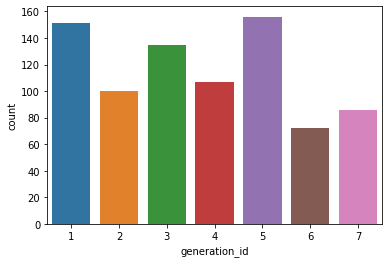

In [8]:
sb.countplot(data = pokemon, x = 'generation_id');

By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the "color" parameter:

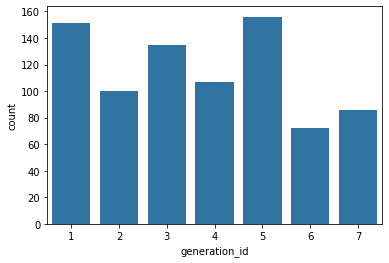

In [9]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

> color_palette returns a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. Calling this function without any parameters returns the current / default palette, and we take the first color to be the color for all bars.

One thing that we might want to do with a bar chart is to sort the data in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

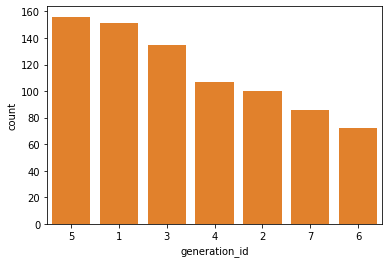

In [10]:
base_color = sb.color_palette()[1]
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, 
              order = gen_order)

## **Additional Variations**
If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels.

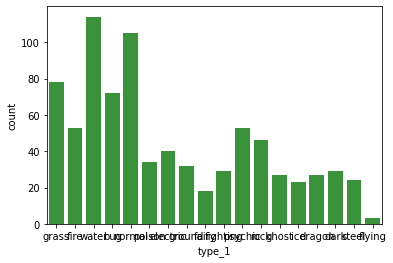

In [11]:
base_color = sb.color_palette()[2]
sb.countplot(data = pokemon, x = 'type_1', color = base_color)

1. one way to deal with it is that, you can use matplotlib's xticks function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

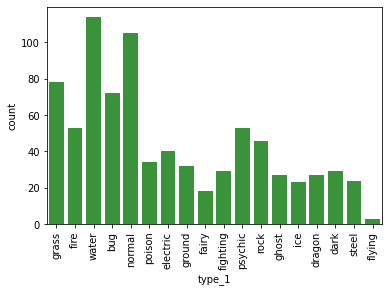

In [12]:
base_color = sb.color_palette()[2]
sb.countplot(data = pokemon, x = 'type_1', color = base_color)
plt.xticks(rotation=90);

2. Another way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":

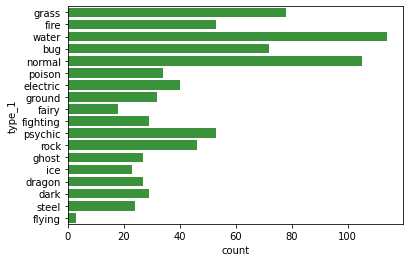

In [14]:
base_color = sb.color_palette()[2]
sb.countplot(data = pokemon, y = 'type_1', color = base_color)

## **Count Missing Data:**
One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.

In [15]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

What if we want to visualize these missing value counts? We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


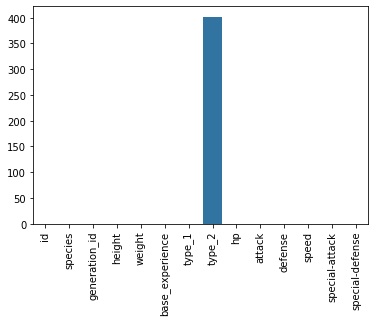

In [17]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation=90);